In [1]:
import numpy as np
import pandas as pd

import plotly.express as ex
# import plotly.graph_objects as go
from kakarake.parallel_coordinates_bands import (
    parallel_coordinates_bands_lines,
    cluster,
    order_objectives,
    calculate_axes_positions,
)


In [2]:
import plotly. io as pio

pio.templates.default = "presentation"

In [3]:
data = pd.read_csv("../data/Obj_arch_nds_1.csv")
#data[["f7", "f8", "f9"]] = data[["f7", "f8", "f9"]] * -1

In [4]:
data

f1      f2    f3    f4     f5       f6      f7    f8     f9   f10  \
0    73.1  1840.0  78.3  2.17  396.0  40900.0 -1470.0 -16.1 -193.0  2.22   
1    75.3  1870.0  79.0  2.34  344.0  41500.0 -1020.0 -17.0 -185.0  2.46   
2    74.3  1880.0  87.4  2.34  448.0  42100.0 -1580.0 -15.8 -198.0  1.87   
3    74.5  1920.0  88.3  2.14  477.0  43000.0 -2070.0 -16.8 -196.0  2.35   
4    73.1  1840.0  78.3  2.17  396.0  40900.0 -1470.0 -16.1 -193.0  2.22   
..    ...     ...   ...   ...    ...      ...     ...   ...    ...   ...   
704  71.6  1580.0  64.1  2.05  288.0  35400.0  -669.0 -14.4 -184.0  1.94   
705  71.6  1570.0  63.6  2.04  284.0  35200.0  -639.0 -14.3 -183.0  1.95   
706  71.6  1570.0  63.6  2.04  284.0  35200.0  -640.0 -14.3 -183.0  1.95   
707  71.6  1580.0  63.8  2.04  285.0  35200.0  -651.0 -14.3 -183.0  1.95   
708  71.6  1580.0  64.1  2.05  288.0  35400.0  -669.0 -14.4 -184.0  1.94   

       f11  
0    0.319  
1    0.343  
2    0.337  
3    0.310  
4    0.319  
..     ...  
704  0.278  
705  0.274  
706  0.274  
707  0.279  
708  0.278  

[709 rows x 11 columns]

In [5]:
def auto_par_coords(
    data: pd.DataFrame,
    solutions: bool = True,
    bands: bool = True,
    medians: bool = True,
    dist_parameter: float = 0.05,
    use_absolute_corr: bool = False,
    distance_formula: int = 1,
    flip_axes: bool = False,
    clustering_algorithm:str="DBSCAN",
    clustering_score:str="silhoutte"
):
    # Calculating correlations and axes positions
    corr, obj_order = order_objectives(data, use_absolute_corr=use_absolute_corr)

    ordered_data, axis_dist, axis_signs = calculate_axes_positions(
        data,
        obj_order,
        corr,
        dist_parameter=dist_parameter,
        distance_formula=distance_formula,
    )
    if not flip_axes:
        axis_signs=None
    groups = cluster(ordered_data, algorithm=clustering_algorithm, score=clustering_score)
    groups = groups - np.min(groups)  # translate minimum to 0.
    fig1 = parallel_coordinates_bands_lines(
        ordered_data,
        color_groups=groups,
        axis_positions=axis_dist,
        axis_signs=axis_signs,
        solutions=solutions,
        bands=bands,
    )
    return fig1, corr, obj_order

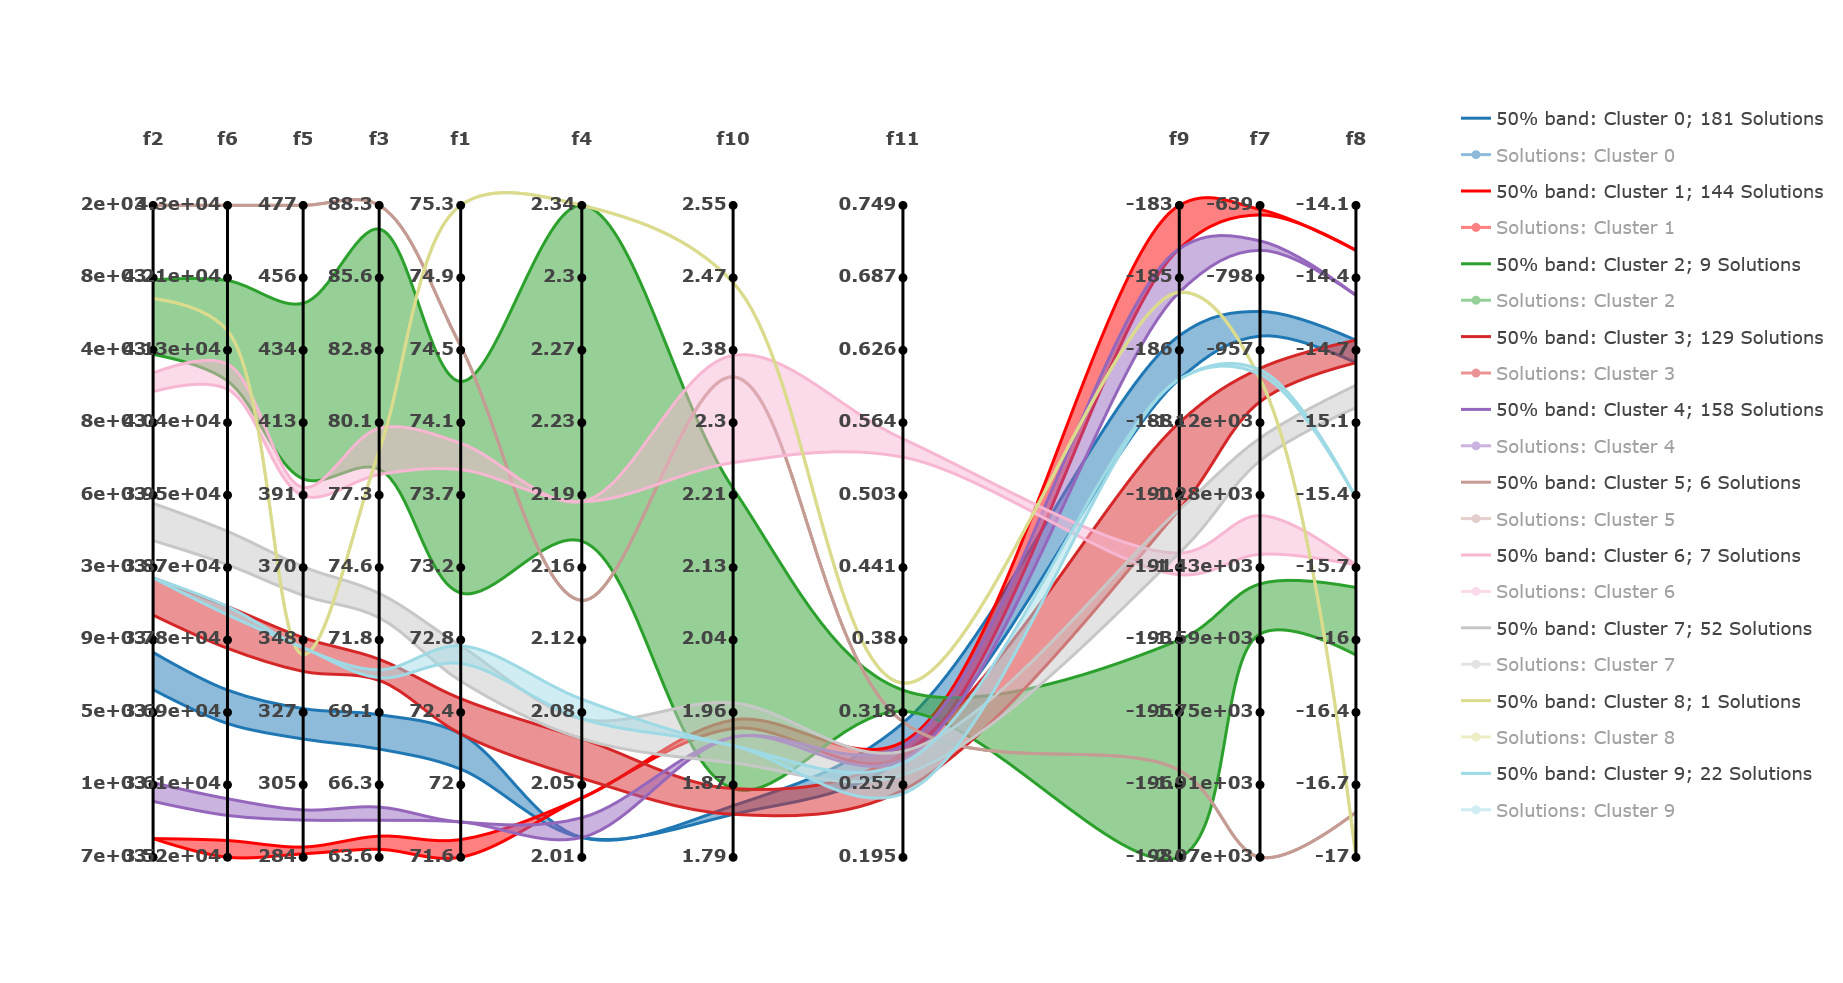

In [6]:
fig1, corr, obj_order = auto_par_coords(
    data, 
    dist_parameter=0.4, 
    clustering_algorithm="GMM",
    clustering_score="BIC"
)
fig1

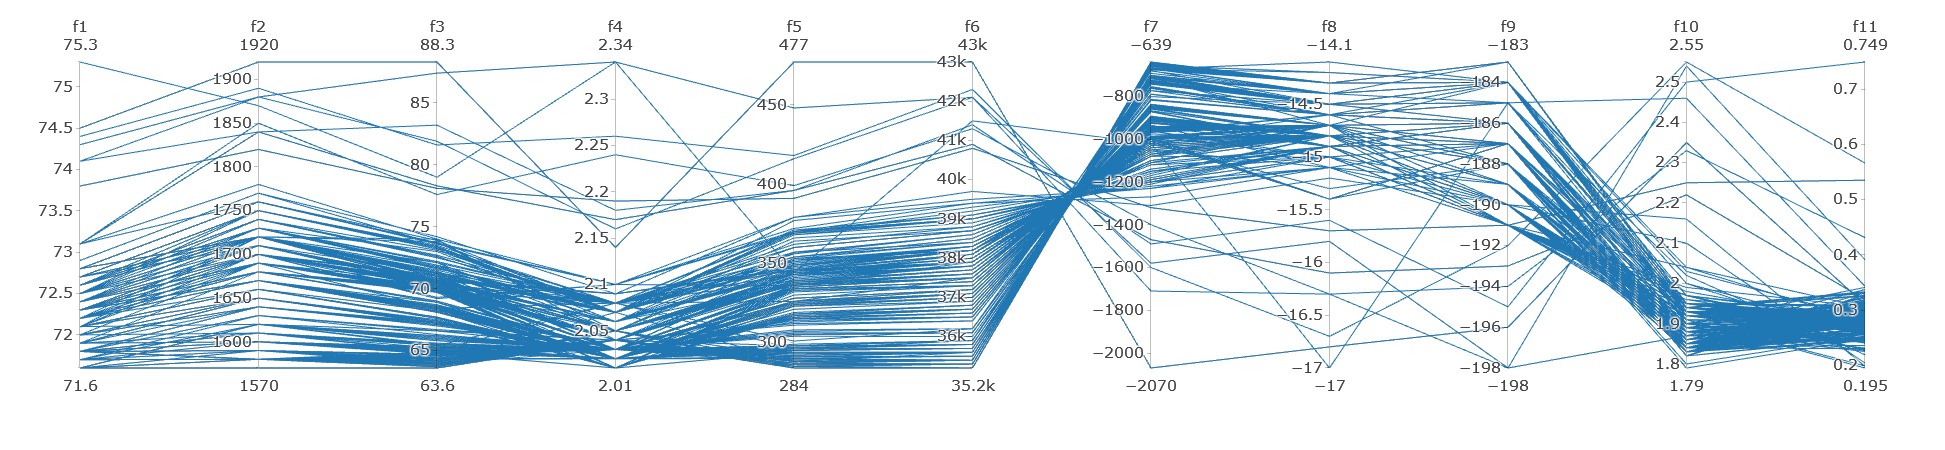

In [9]:
ex.parallel_coordinates(data)

(-inf, 0.01)


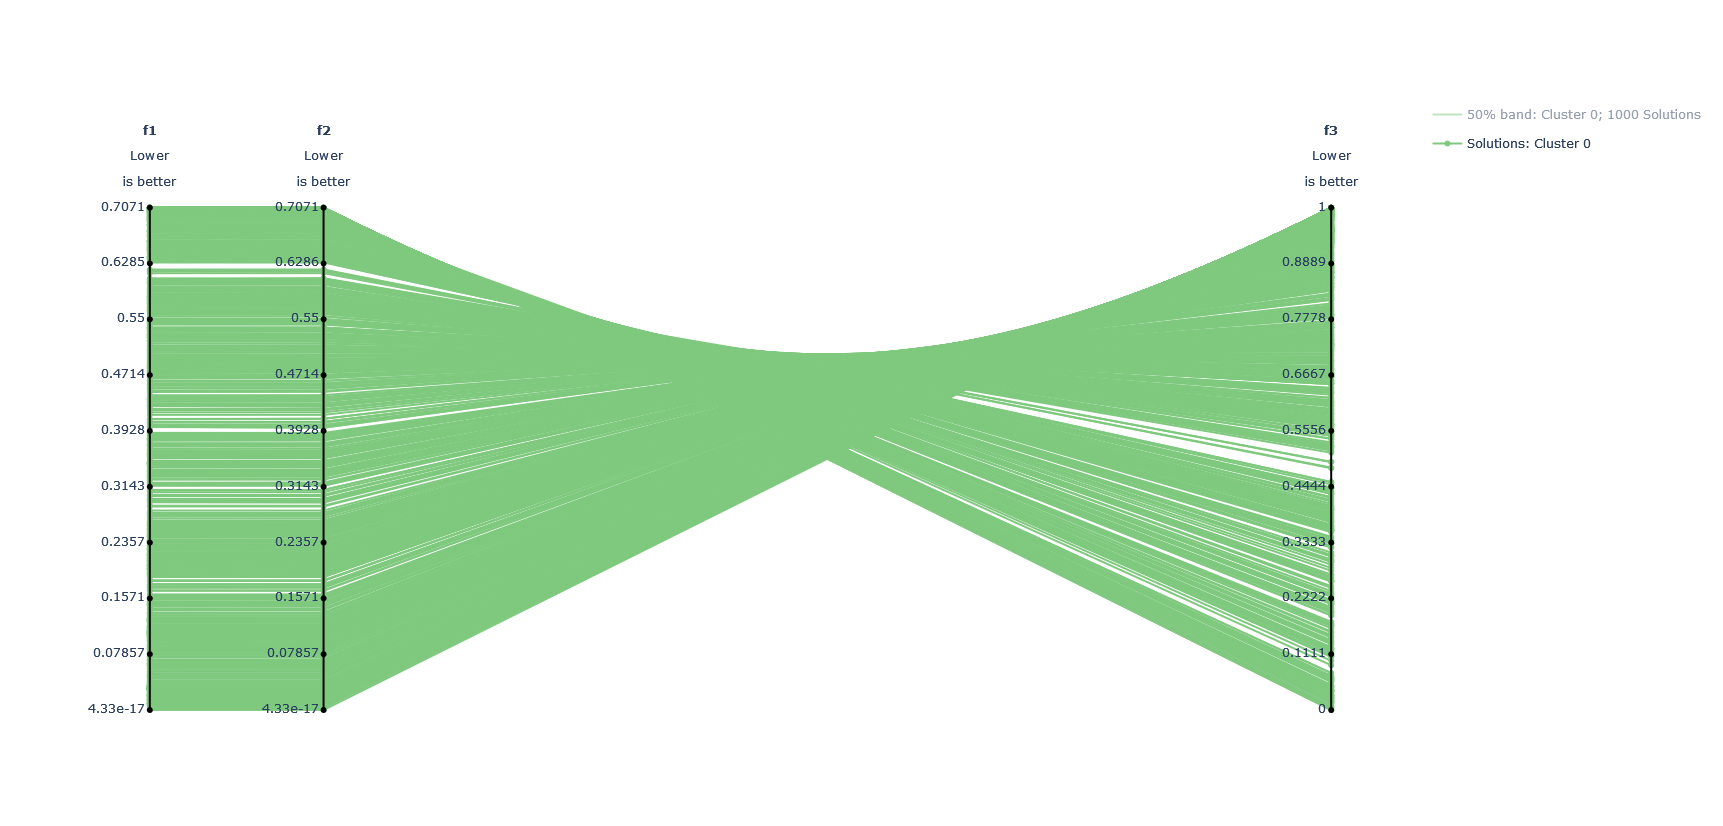

In [7]:
auto_par_coords(data, dist_parameter=0.4)

In [54]:
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap

In [158]:
mds = manifold.MDS(n_components=2)
test = StandardScaler().fit_transform(data)
groups = cluster(test, algorithm="GMM", score="BIC")

In [159]:
np.unique(groups)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [130]:
xy = mds.fit_transform(test)

In [81]:
len(list(np.unique(groups)))

2

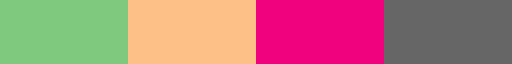

In [82]:
cmap

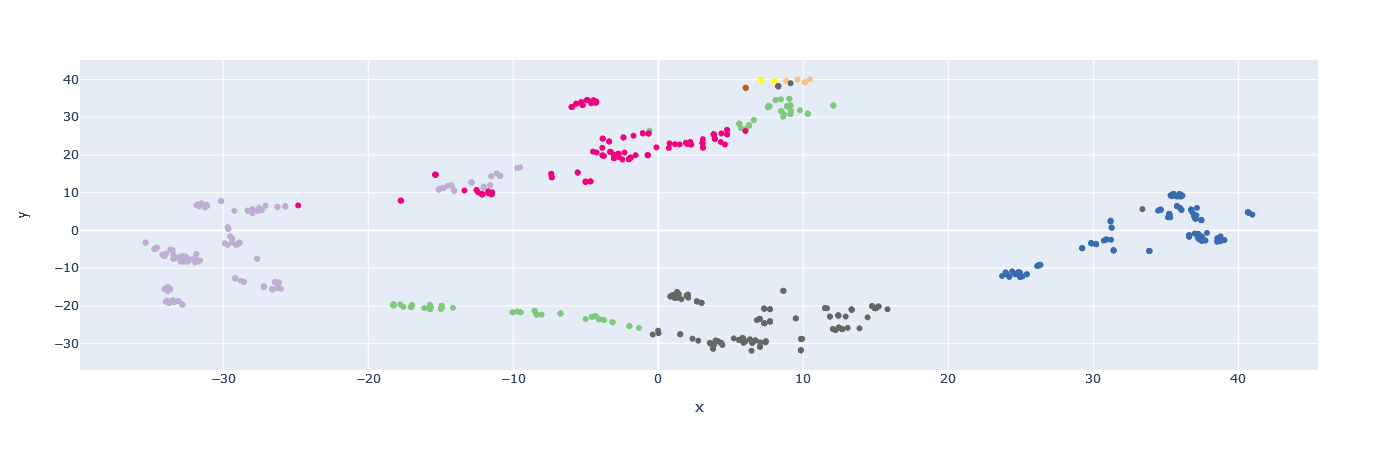

In [162]:
cmap=get_cmap("Accent", len(np.unique(groups)))
colors = [f"rgba{cmap(group)}" for group in groups]
fig = ex.scatter(
    x=xy[:,0], 
    y=xy[:,1], 
    color=groups,)

fig.data[0]["marker"]["color"] = [f"rgba{cmap(group)}" for group in groups]
fig

In [143]:
tsne = manifold.TSNE(n_components=2)
xy = tsne.fit_transform(test)

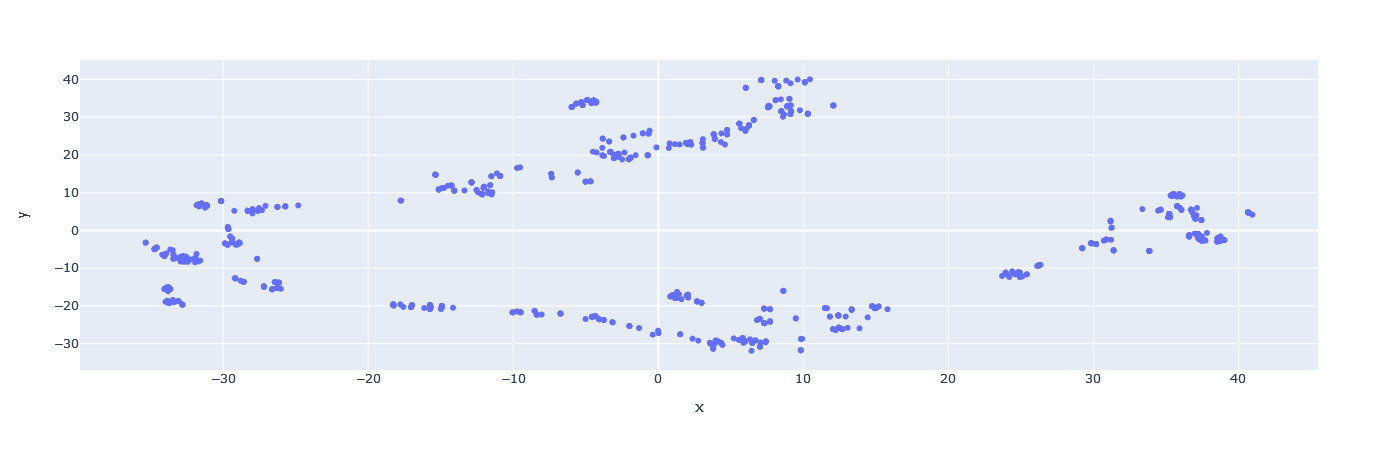

In [144]:
ex.scatter(x=xy[:,0], y=xy[:,1])

In [8]:
from kakarake.parallel_coordinates_bands import annotated_heatmap


In [6]:
from sklearn.metrics.pairwise import pairwise_distances

In [13]:
pairwise_distances(data, metric="manhattan").max()

9817.636

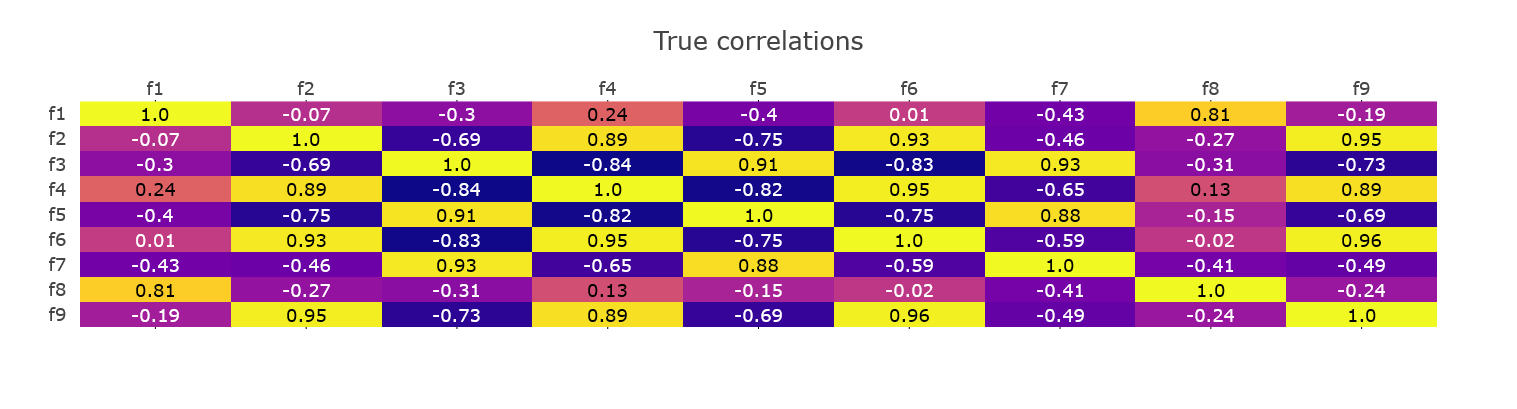

In [24]:
annotated_heatmap(corr, col_names=data.columns, order=list(range(9)))

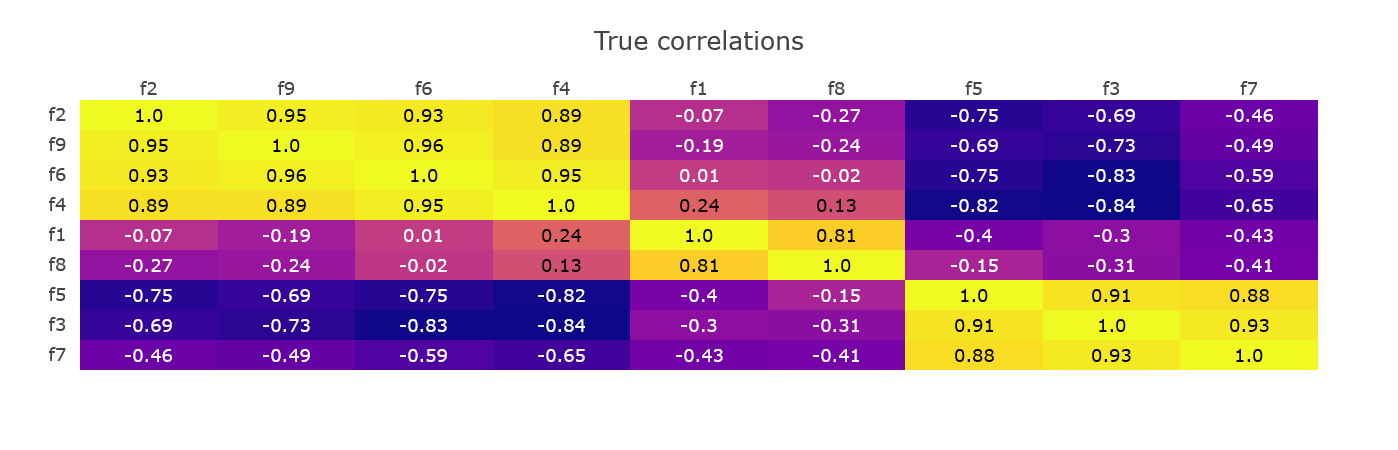

In [25]:
annotated_heatmap(corr, col_names=data.columns, order=obj_order)

In [21]:
corr

array([[ 1.        , -0.06867157, -0.30131876,  0.23728584, -0.39617528,
         0.00727041, -0.43398222,  0.8061861 , -0.1941094 ],
       [-0.06867157,  1.        , -0.69243792,  0.88745072, -0.74729736,
         0.92632448, -0.46185691, -0.26602401,  0.9539108 ],
       [-0.30131876, -0.69243792,  1.        , -0.84157762,  0.9062054 ,
        -0.82978283,  0.92667464, -0.31200345, -0.7334357 ],
       [ 0.23728584,  0.88745072, -0.84157762,  1.        , -0.81760933,
         0.94893781, -0.65278762,  0.13124025,  0.8924724 ],
       [-0.39617528, -0.74729736,  0.9062054 , -0.81760933,  1.        ,
        -0.75289675,  0.87812263, -0.14614075, -0.68589763],
       [ 0.00727041,  0.92632448, -0.82978283,  0.94893781, -0.75289675,
         1.        , -0.59052445, -0.02203074,  0.95987462],
       [-0.43398222, -0.46185691,  0.92667464, -0.65278762,  0.87812263,
        -0.59052445,  1.        , -0.41244215, -0.48555224],
       [ 0.8061861 , -0.26602401, -0.31200345,  0.13124025, -0

In [13]:
a = 53.123432543

In [19]:
"<b>{:.4g}</b>".format(a)

'<b>53.12</b>'